In [66]:
import torch
import numpy as np 
from torch.autograd import Variable
import torch.nn.functional as fun
import matplotlib.pyplot as plt
import torch.utils.data as Data

In [67]:
#超参数
LR=0.01
BATCH_SIZE=32
EPOCH=12

In [70]:
#fake data
x=torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

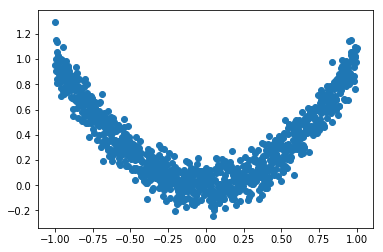

In [71]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [72]:
#批训练定义
torch_dataset=Data.TensorDataset(x,y)
Loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [73]:
#网络定义
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_predict):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_predict)
    def forward(self,x):
        x=torch.relu(self.hidden(x))
        x=self.predict(x)
        return x

In [74]:
#构建四个神经网络
net_SGD=Net(1,20,1)
net_Momentum=Net(1,20,1)
net_RMSprop=Net(1,20,1)
net_Adam=Net(1,20,1)
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]

In [75]:
#四种优化器
opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers=[opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

In [76]:
#损失函数
loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[]] #用于存四个损失值

0
1
2
3
4
5
6
7
8
9
10
11


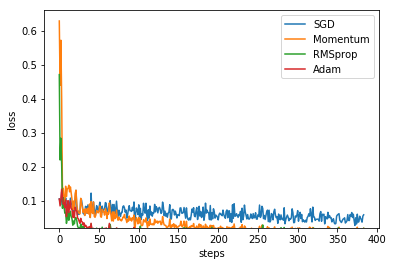

In [77]:
#批训练
for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x,batch_y) in enumerate(Loader):
        b_x=Variable(batch_x)
        b_y=Variable(batch_y)
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            prediction=net(b_x)
            loss=loss_func(prediction,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.item()) #记录
#打印
labels=['SGD','Momentum','RMSprop','Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])
plt.legend(loc='best')
plt.xlabel('steps')
plt.ylabel('loss')
plt.ylim((0.02))
plt.show()